In [1]:
import tensorflow as tf
from tensorflow import keras

Hack pro GPU na Windows

In [2]:
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

### Načteme data

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
X_train[0].shape

(28, 28)

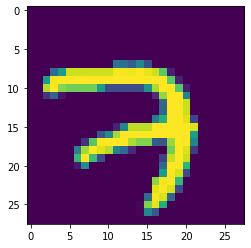

In [6]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

### Připravíme data

Potřebujeme hodnoty 0-255 škálovat. Kromě StandardScaler(), který jsme si ukazovali, lze prostě a jednoduše hodnoty vydělit 255 a bude to také fungovat.

In [7]:
X_train = X_train / 255.
X_valid = X_valid / 255.
X_test = X_test / 255.

Z (instance, 28, 28) potřebujeme udělat (instance, 28, 28, 1)

In [8]:
import numpy as np 

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [9]:
X_train.shape

(55000, 28, 28, 1)

### Vytvoříme model

In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax"),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop",
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.3036 - accuracy: 0.9050 - val_loss: 0.0556 - val_accuracy: 0.9838
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.0521 - val_accuracy: 0.9866
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0308 - accuracy: 0.9912 - val_loss: 0.0325 - val_accuracy: 0.9920
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0232 - accuracy: 0.9931 - val_loss: 0.0345 - val_accuracy: 0.9912
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0409 - val_accuracy: 0.9914
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0350 - val_accuracy: 0.9888
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.0648 - val_accurac

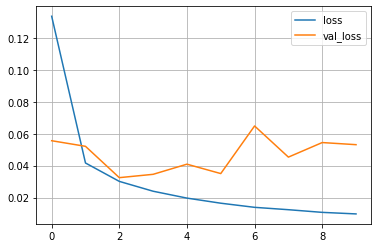

In [14]:
import pandas as pd
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.grid(True)

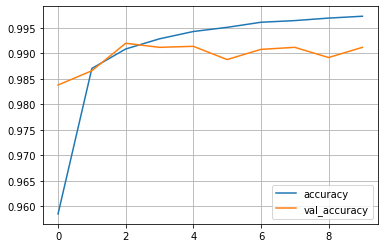

In [15]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.grid(True)

### Vyzkoušíme na testovacích datech

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0366 - accuracy: 0.9927


[0.03662428259849548, 0.9926999807357788]

**Dense model měl chybovost cca 3 %, tady jsme se dostali na 0,9 %, takže relativní snížení chyby o zhruba 70 %.**